In [319]:
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
# from datetime import datetime
from datetime import date
import holidays

In [320]:
L=pd.read_csv("SCL_III.csv")
L.head()

,Date,DF,D,AD,HourPST,HourUTC,Day,Day Name
0,7/1/2015,865.0,873.0,873,0,8.0,3,Wednesday
1,7/1/2015,841.0,833.0,833,1,9.0,3,Wednesday
2,7/1/2015,790.0,802.0,802,2,10.0,3,Wednesday
3,7/1/2015,783.0,796.0,796,3,11.0,3,Wednesday
4,7/1/2015,800.0,807.0,807,4,12.0,3,Wednesday


In [321]:
W=pd.read_csv("AGW_III.csv")
W.head()

,Date,HourPST,HourUTC,MinTmp,AvgTmp,MaxTmp,Dewpt,RH,WindSpd,WindGust,WindDir,AtmPrs,Temp,Day,Day Name
0,7/1/2015,0,8,62.5,63.3,64.0,53.4,70.1,0.0,0.0,N,30.06,62.8,3,Wednesday
1,7/1/2015,1,9,61.1,61.5,62.0,53.9,76.2,0.0,0.0,N,30.06,61.0,3,Wednesday
2,7/1/2015,2,10,60.4,60.8,61.1,54.7,80.2,0.0,0.0,N,30.06,60.2,3,Wednesday
3,7/1/2015,3,11,60.1,60.3,60.6,55.0,82.5,0.0,0.0,N,30.06,59.8,3,Wednesday
4,7/1/2015,4,12,59.5,59.8,60.1,54.7,83.2,0.0,0.0,N,30.06,59.3,3,Wednesday


In [322]:
L["tdate"]=pd.to_datetime(L.Date)+   pd.to_timedelta(L.HourPST, unit='h')

In [323]:
L.head()

,Date,DF,D,AD,HourPST,HourUTC,Day,Day Name,tdate
0,7/1/2015,865.0,873.0,873,0,8.0,3,Wednesday,2015-07-01 00:00:00
1,7/1/2015,841.0,833.0,833,1,9.0,3,Wednesday,2015-07-01 01:00:00
2,7/1/2015,790.0,802.0,802,2,10.0,3,Wednesday,2015-07-01 02:00:00
3,7/1/2015,783.0,796.0,796,3,11.0,3,Wednesday,2015-07-01 03:00:00
4,7/1/2015,800.0,807.0,807,4,12.0,3,Wednesday,2015-07-01 04:00:00


In [324]:
W["tdate"]=pd.to_datetime(W.Date) +   pd.to_timedelta(W.HourPST, unit='h')

In [325]:
W.head()

,Date,HourPST,HourUTC,MinTmp,AvgTmp,MaxTmp,Dewpt,RH,WindSpd,WindGust,WindDir,AtmPrs,Temp,Day,Day Name,tdate
0,7/1/2015,0,8,62.5,63.3,64.0,53.4,70.1,0.0,0.0,N,30.06,62.8,3,Wednesday,2015-07-01 00:00:00
1,7/1/2015,1,9,61.1,61.5,62.0,53.9,76.2,0.0,0.0,N,30.06,61.0,3,Wednesday,2015-07-01 01:00:00
2,7/1/2015,2,10,60.4,60.8,61.1,54.7,80.2,0.0,0.0,N,30.06,60.2,3,Wednesday,2015-07-01 02:00:00
3,7/1/2015,3,11,60.1,60.3,60.6,55.0,82.5,0.0,0.0,N,30.06,59.8,3,Wednesday,2015-07-01 03:00:00
4,7/1/2015,4,12,59.5,59.8,60.1,54.7,83.2,0.0,0.0,N,30.06,59.3,3,Wednesday,2015-07-01 04:00:00


In [326]:
# check for duplicate values
print(L.tdate.unique().size)
print(W.tdate.unique().size)
print(L.shape,W.shape)

40074
40019
(40079, 9) (40023, 16)


In [327]:

# dates=L.tdate
# dups=dates.duplicated()
# idx=np.where(dups==True)[0]
# print(idx.size)
# L.iloc[idx
X=L.tdate.duplicated(keep=False).values
idx=np.where(X==True)[0]
print(idx.size)
L.iloc[idx,:]

10


,Date,DF,D,AD,HourPST,HourUTC,Day,Day Name,tdate
2976,11/1/2015,965.0,949.0,949,24,NaN,0,Sunday,2015-11-02
2977,11/2/2015,885.0,896.0,896,0,8.0,1,Monday,2015-11-02
11880,11/6/2016,965.0,928.0,928,24,NaN,0,Sunday,2016-11-07
11881,11/7/2016,880.0,873.0,873,0,8.0,1,Monday,2016-11-07
20616,11/5/2017,1110.0,NaN,1110,24,NaN,0,Sunday,2017-11-06
20617,11/6/2017,1090.0,1089.0,1089,0,8.0,1,Monday,2017-11-06
29352,11/4/2018,1025.0,900.0,900,24,NaN,0,Sunday,2018-11-05
29353,11/5/2018,870.0,854.0,854,0,8.0,1,Monday,2018-11-05
38088,11/3/2019,NaN,959.0,959,24,NaN,0,Sunday,2019-11-04
38089,11/4/2019,941.0,925.0,925,0,8.0,1,Monday,2019-11-04


In [328]:
idx

array([ 2976,  2977, 11880, 11881, 20616, 20617, 29352, 29353, 38088,
       38089])

In [329]:
#idx[::2]
L.drop(index=idx[::2],inplace=True)
L.shape

(40074, 9)

In [330]:
X=W.tdate.duplicated(keep=False).values
idx=np.where(X==True)[0]
print(idx.size)
W.iloc[idx,:]

8


,Date,HourPST,HourUTC,MinTmp,AvgTmp,MaxTmp,Dewpt,RH,WindSpd,WindGust,WindDir,AtmPrs,Temp,Day,Day Name,tdate
6137,3/13/2016,2,10,41.7,43.0,43.9,38.6,84.3,2.6,8.9,E,29.71,42.8,0,Sunday,2016-03-13 02:00:00
6138,3/13/2016,2,10,42.1,43.1,43.7,39.6,87.5,3.7,8.9,E,29.69,42.9,0,Sunday,2016-03-13 02:00:00
14860,3/12/2017,2,10,47.2,47.4,47.5,44.6,89.8,5.6,14.2,E,30.25,47.3,0,Sunday,2017-03-12 02:00:00
14861,3/12/2017,2,10,47.4,47.5,47.7,44.5,89.0,5.2,12.8,E,30.25,47.4,0,Sunday,2017-03-12 02:00:00
23584,3/11/2018,2,10,36.7,37.1,37.5,33.7,87.3,1.9,4.2,NW,30.11,37.1,0,Sunday,2018-03-11 02:00:00
23585,3/11/2018,2,10,36.2,36.5,36.8,33.4,88.4,1.6,4.2,NW,30.11,36.4,0,Sunday,2018-03-11 02:00:00
32308,3/10/2019,2,10,30.8,31.1,31.4,29.3,94.0,2.4,3.5,N,30.15,30.8,0,Sunday,2019-03-10 02:00:00
32309,3/10/2019,2,10,30.1,30.3,30.4,28.7,95.1,1.1,2.8,N,30.16,29.9,0,Sunday,2019-03-10 02:00:00


In [331]:
#idx[::2]
W.drop(index=idx[::2],inplace=True)
W.shape

(40019, 16)

In [332]:
data=L.merge(W,how="inner",left_on="tdate",right_on="tdate")
data.shape

(40015, 24)

In [333]:
columns=data.columns.values
columns

array(['Date_x', 'DF', 'D', 'AD', 'HourPST_x', 'HourUTC_x', 'Day_x',
       'Day Name_x', 'tdate', 'Date_y', 'HourPST_y', 'HourUTC_y',
       'MinTmp', 'AvgTmp', 'MaxTmp', 'Dewpt', 'RH', 'WindSpd', 'WindGust',
       'WindDir', 'AtmPrs', 'Temp', 'Day_y', 'Day Name_y'], dtype=object)

In [334]:
from sklearn.preprocessing import LabelEncoder as le

data['WindDir'].unique()
wdc = le()
wdc.fit(data['WindDir'])
data['WindDir'] = wdc.transform(data.WindDir)
data["WindDir"].head(30)

0     1
1     1
2     1
3     1
4     1
5     3
6     3
7     3
8     3
9     3
10    7
11    7
12    7
13    7
14    7
15    3
16    7
17    7
18    7
19    7
20    7
21    3
22    3
23    3
24    1
25    3
26    1
27    1
28    3
29    1
Name: WindDir, dtype: int64

In [335]:
# Add weekend check
data['weekend']=((data.tdate.dt.dayofweek // 5 == 1)).astype(int)

# Add holiday check
# If a federal holiday falls on Saturday it is usually observed on Friday (the day before),
# and when it falls on Sunday it is observed the following Monday. 
cal = calendar();
us_holidays=cal.holidays(start=data.tdate.min(), end=data.tdate.max())
data['holiday'] = data['tdate'].dt.date.astype('datetime64').isin(us_holidays)

# Add 3 day holiday weekend check
thday=[False]*data.shape[0]
for i in range(0,data['Day_x'].shape[0]):
    if data['holiday'].iloc[i]==True:
        # on a Monday
        if data['Day_x'].iloc[i]==1:
            thday[i]=True
            for j in range(0,49):
                thday[i-j]=True
        # on a Friday
        if data['Day_x'].iloc[i]==5:
            thday[i]=True
            for j in range(0,49):
                thday[i+j]=True

data['3-day_holiday_wkend']=thday

In [336]:
data["month"]=data["tdate"].dt.month
data.head()

def lagged_values(df,name,lags):
    colIndex = df.columns.get_loc(name)
    newdf = pd.DataFrame()
    for i in range(1,lags+1):
        label=name+"_"+str(i)
        newdf.insert(i-1,label,0)
        newdf[label] = df[name].shift(i,fill_value=np.nan)
        avg = round(newdf.iloc[:, 0:23].mean(axis=1),2)
        df[name+"_AVG_"+str(lags)] = avg
        
avg = 48
    
lagged_values(data,"DF",avg)
lagged_values(data,"D",avg)
lagged_values(data,"AD",avg)
lagged_values(data,"MinTmp",avg)
lagged_values(data,"AvgTmp",avg)
lagged_values(data,"Dewpt",avg)
lagged_values(data,"RH",avg)
lagged_values(data,"WindSpd",avg)
lagged_values(data,"WindGust",avg)
lagged_values(data,"AtmPrs",avg)
lagged_values(data,"Temp",avg)
lagged_values(data,"WindDir",avg)

In [337]:
columns=data.columns.values
columns

array(['Date_x', 'DF', 'D', 'AD', 'HourPST_x', 'HourUTC_x', 'Day_x',
       'Day Name_x', 'tdate', 'Date_y', 'HourPST_y', 'HourUTC_y',
       'MinTmp', 'AvgTmp', 'MaxTmp', 'Dewpt', 'RH', 'WindSpd', 'WindGust',
       'WindDir', 'AtmPrs', 'Temp', 'Day_y', 'Day Name_y', 'weekend',
       'holiday', '3-day_holiday_wkend', 'month', 'DF_AVG_48', 'D_AVG_48',
       'AD_AVG_48', 'MinTmp_AVG_48', 'AvgTmp_AVG_48', 'Dewpt_AVG_48',
       'RH_AVG_48', 'WindSpd_AVG_48', 'WindGust_AVG_48', 'AtmPrs_AVG_48',
       'Temp_AVG_48', 'WindDir_AVG_48'], dtype=object)

In [338]:
data.fillna(data.mean(), inplace=True)

In [339]:
Y=data["AD"].values
X=data[['HourPST_x',
        'Day_x',
        'MinTmp',
        'AvgTmp',
        'MaxTmp', 
        'Dewpt', 
        'RH', 
        'WindSpd', 
        'WindGust', 
        'AtmPrs', 
        'Temp', 
        'Day_y',
        'weekend',
        'holiday',
        '3-day_holiday_wkend',
        'month',
        'DF_AVG_'+str(avg),
        'D_AVG_'+str(avg),
        'AD_AVG_'+str(avg),
        'MinTmp_AVG_'+str(avg),
        'AvgTmp_AVG_'+str(avg),
        'Dewpt_AVG_'+str(avg),
        'RH_AVG_'+str(avg),
        'WindSpd_AVG_'+str(avg),
        'WindGust_AVG_'+str(avg),
        'AtmPrs_AVG_'+str(avg),
        'Temp_AVG_'+str(avg),
        'WindDir_AVG_'+str(avg)]].values

In [340]:
idx=np.arange(data.shape[0])
n=idx.size
n_cut=int(.7*n)
n_cut

28010

In [341]:
x_train=X[idx[:n_cut],:]
x_test=X[idx[n_cut:],:]

y_train=Y[idx[:n_cut]]
y_test=Y[idx[n_cut:]]

In [342]:
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor as gbr

In [343]:
# reg=rf(n_estimators=100)
# reg.fit(x_train,y_train)

reg = gbr(n_estimators=100)
reg.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [369]:
max_depth=[3, 5, 10]
n_estimators=[10,100,200,400]
learning_rate=np.linspace(.1,1,10)

from sklearn.model_selection import GridSearchCV

grid={"n_estimators":n_estimators, "max_depth":max_depth, "learning_rate":learning_rate}

gb_grid=GridSearchCV(estimator=gbr(), param_grid=grid,cv=3)

In [370]:
gb_grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [367]:
gb_grid.best_params_

{'n_estimators': 400}

In [344]:
y_pred=reg.predict(x_test)

In [345]:
%matplotlib inline
import matplotlib.pyplot as plt

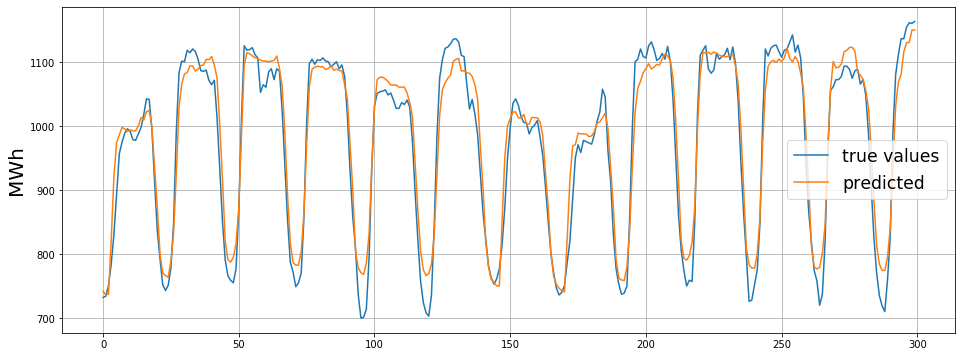

In [346]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)
ax.set_ylabel("MWh",size=20)

ax.plot(y_test[100:400],label="true values")
ax.plot(y_pred[100:400],label="predicted")
ax.grid()
ax.legend(fontsize="xx-large")

In [347]:
mean_squared_error(y_test, y_pred)

2099.3234633333377

In [348]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred)

3.336148492617795

In [349]:
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.66 %.


In [351]:
res = y_test - y_pred

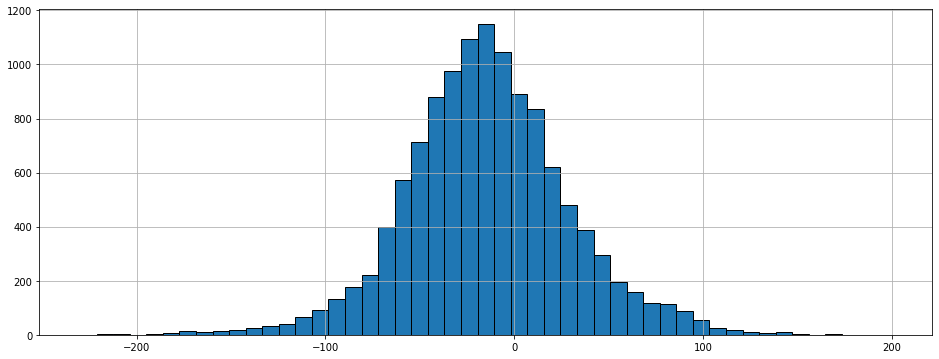

In [354]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot(111)

bins=np.linspace(-230,200,50)

ax.hist(res,bins,edgecolor="black",label="residual")
ax.grid()